# Red Wine Quality Activity

Contoso Farm Data Systems is opening a new line products for the wine makers of the world. The goal of Contessa’s newest efforts is to develop an application that can predict the quality of wine based on a number of factors. Additionally, they have a small dataset of wine data that they would like to be sorted into different classifications.

In this project you will do both regression and classification tasks on this data. It will test your understanding in different fields – outlier detection, feature selection, and unbalanced data. There are 1599 rows and 12 columns in this dataset.


## What is objective in wine quality?

As data scientists working with red wine, it's important that we understand the **domain** of wine to the level that we can make some inferences about data.

Since we are all not wine experts, let's spend a few minutes going over what makes wine good or bad.

A good wine is, above all, a wine that you like enough to drink, because the whole purpose of a wine is to give pleasure to those who drink it. After that, how good a wine is depends on how it measures up to a set of (more or less) agreed-upon standards of performance established by experienced, trained experts. These standards involve mysterious concepts like balance, length, depth, complexity, finish, and trueness to type of wine. None of these concepts is objectively measurable, by the way. So how do we test this data to figure out it's quality?

Taste is personal. Literally! The perception of the basic tastes on the tongue varies from one person to the next. Research has proven that some people have more taste buds than others, and are, therefore, more sensitive to characteristics such as sourness or bitterness in food and beverages. The most sensitive tasters are called, somewhat misleadingly, supertasters — not because they’re more expert, but because they perceive sensations such as bitterness more acutely. If you find diet sodas very bitter, or if you need to add a lot of sugar to your coffee to make it palatable, you might fall into this category — and you, therefore, might find many red wines unpleasant, even if other people consider them great.

### Balance

The three words sweetness, acidity, and tannin represent three of the major components (parts) of wine. The fourth is alcohol. Besides being one of the reasons we often want to drink a glass of wine in the first place, alcohol is an important player in wine quality.

Balance is the relationship of these four components to one another. A wine is balanced when nothing sticks out, such as harsh tannin or too much sweetness, as you taste the wine. Most wines are balanced to most people. But if you have any pet peeves about food — if you really hate anything tart, for example, or if you never eat sweets — you might perceive some wines to be unbalanced. If you perceive them to be unbalanced, then they are unbalanced for you. (Professional tasters know their own idiosyncrasies and adjust for them when they judge wine.)

### Length

When we call wines long or short, we’re not referring to the size of the bottle or how quickly we empty it. Length describes a wine that gives an impression of going all the way on the palate — you can taste it across the full length of your tongue — rather than stopping short halfway through your tasting of it. Many wines today are very upfront on the palate — they make a big impression as soon as you taste them, but they don’t go the distance in your mouth. In other words, they’re short. Length is increasingly used also to describe a wine with a long aftertaste. (See the section, “Finish,” just ahead.) Length in the mouth can more precisely be called palate length, to avoid confusion. Long palate length is a sure sign of high quality.

### Depth

Depth is another subjective, unmeasurable attribute of a high-quality wine. We say a wine has depth when it seems to have a dimension of verticality — that is, it doesn’t taste flat and one-dimensional in your mouth. A “flat” wine can never be great.

### Complexity

Nothing is wrong with a simple, straightforward wine, especially if you enjoy it. But a wine that keeps revealing different things about itself, always showing you a new flavor or impression — a wine that has complexity — is usually considered better quality. Generally, experts use the term complexity specifically to indicate that a wine has a multiplicity of aromas and flavors; some people use the term it in a more holistic (but less precise) sense, to refer to the total impression a wine gives you, but this use is becoming uncommon.

### Finish
The impression a wine leaves in the back of your mouth and in your throat after you swallow it is its finish or aftertaste. In a good wine, you can still perceive the wine’s flavors, such as fruitiness or spiciness, at that point. The more enduring the positive flavor perception is, the longer the finish is. Some wines may finish hot, because of high alcohol, or bitter, because of tannin — both shortcomings. Or a wine may have nothing much at all to say for itself after you swallow, which tells you that it is probably not a great wine.

### Now what?

We can see that it's going to be hard to match up these qualities with the qualities that are present in the wine study. We can intuitively infer some things but the accuracy of those inferences are going to be very subject. To start let's take a deep dive and look at the data with a number of different visualizations to see if we can make some connections to the data.



In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# These packages are the standard Python libraries for data science that we've used in our workshops.
# The only new one is the missingno package. Look up that package and figure out what it does.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# Configure the data viz and set some graph styles
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight') # What is a FiveThirtyEight style sheet?
sns.set(style='whitegrid',color_codes=True)

# Since we are going to look at a number of models let's import them all now.

# Here are the scikit-learn modules that we will use for classification.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

# Linear Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

# Evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

*Notes from Sarah to Dan*  
You mention `he only new one is the missingno package. Look up that package and figure out what it does.` - can you provide a link somewhere?

Looking at the imports above it's easy to just wash over the lines of code here and not pay too much attention. Take some time before you continue to look at each command. If you don't know what it does, use the built in documentation in IPython/Jupyter Notebooks to explore.

*Notes from Sarah to Dan*  
Can you introduce this data set first? `This dataset contains data about the different attributes of both red and white wines...` or something?

In [2]:
df=pd.read_csv(r'Data/winequality.csv')

There are three data files with wine quality data on them--when you complete the red wine experiments, you can go on the look at the larger datasets.

*Notes from Sarah to Dan*  
Can you be more explicit here? You're importing the general wine one, do you mean that when they finish with this one you encourage them to try out the same process but with the white and red wine data sets as well?

In [3]:
df.shape

(1599, 12)

In [4]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Look at the data

`Quality` is the variable that we want to predict. Look at the data above. Notice that we have the `quality` values on the right side of the sheet. Our task, in laymans terms, is to compare the `quality` value to the other values and come up with a way to figure out how that value was calculated. 

In [5]:
df.columns 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Exploring the dataset

*Notes from Sarah to Dan*  
Can you add a sentence or two about what they are about to do, just to orient learners

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Check for null and NaN values

From the .info function we can see that the data seems pretty complete, let's take a deeper look.

*Notes from Sarah to Dan*  
Again, just some more explicit words around what is happening `We want to see if any null values exist so that we can address those right at the beginning`

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Another way to visualize null values

*Notes from Sarah to Dan*  
Again, just finish up the sentence `is to use matplotlib's matrix graph which will show any null values, we can see that we dont have any` or something like that

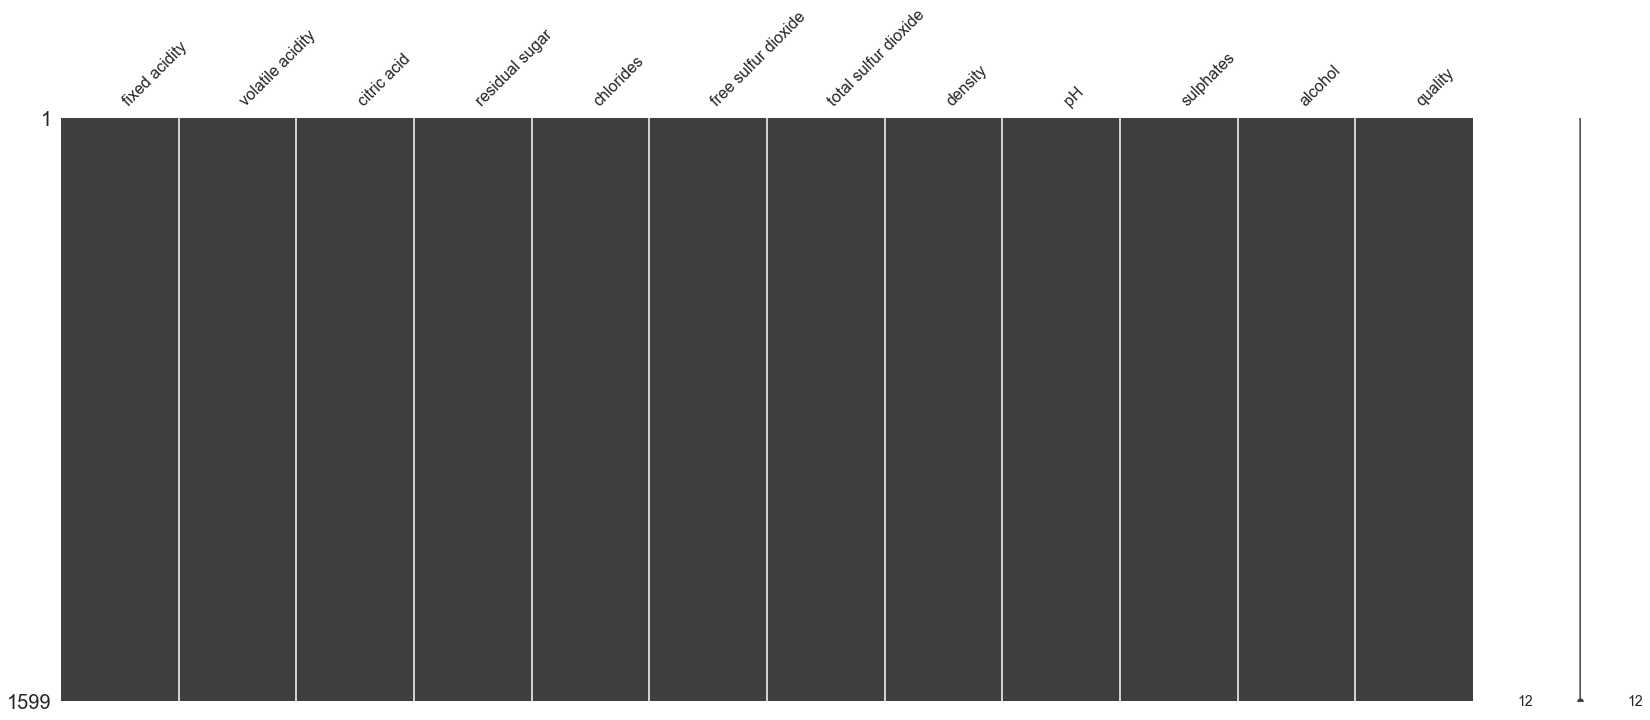

In [8]:
msno.matrix(df)  

#  Visualization of the distribution of variables using `describe()`

Descriptive or summary statistics in python (using pandas), can be obtained by using describe function (`describe()). The `describe()` Function gives the mean, std and IQR (InterQuartile Rage) values.

Generally the `describe()` function excludes the character columns and gives summary statistics of numeric columns.  
We need to add a parameter `include=’all’` to get the summary statistics or descriptive statistics of both numeric and character column.

We can see that the max value for `quality` here is 8.00 and the lowest value given to a wine is a 3.00. 

In [9]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Factorplots and FacetGrids: Exploring data using other methods

The FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

A FacetGrid can be drawn with up to three dimensions − row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

FacetGrid object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid.

The variables should be categorical and the data at each level of the variable will be used for a facet along that axis.

Let's use seaborn to create a FacetGrid and look at the data in another way.

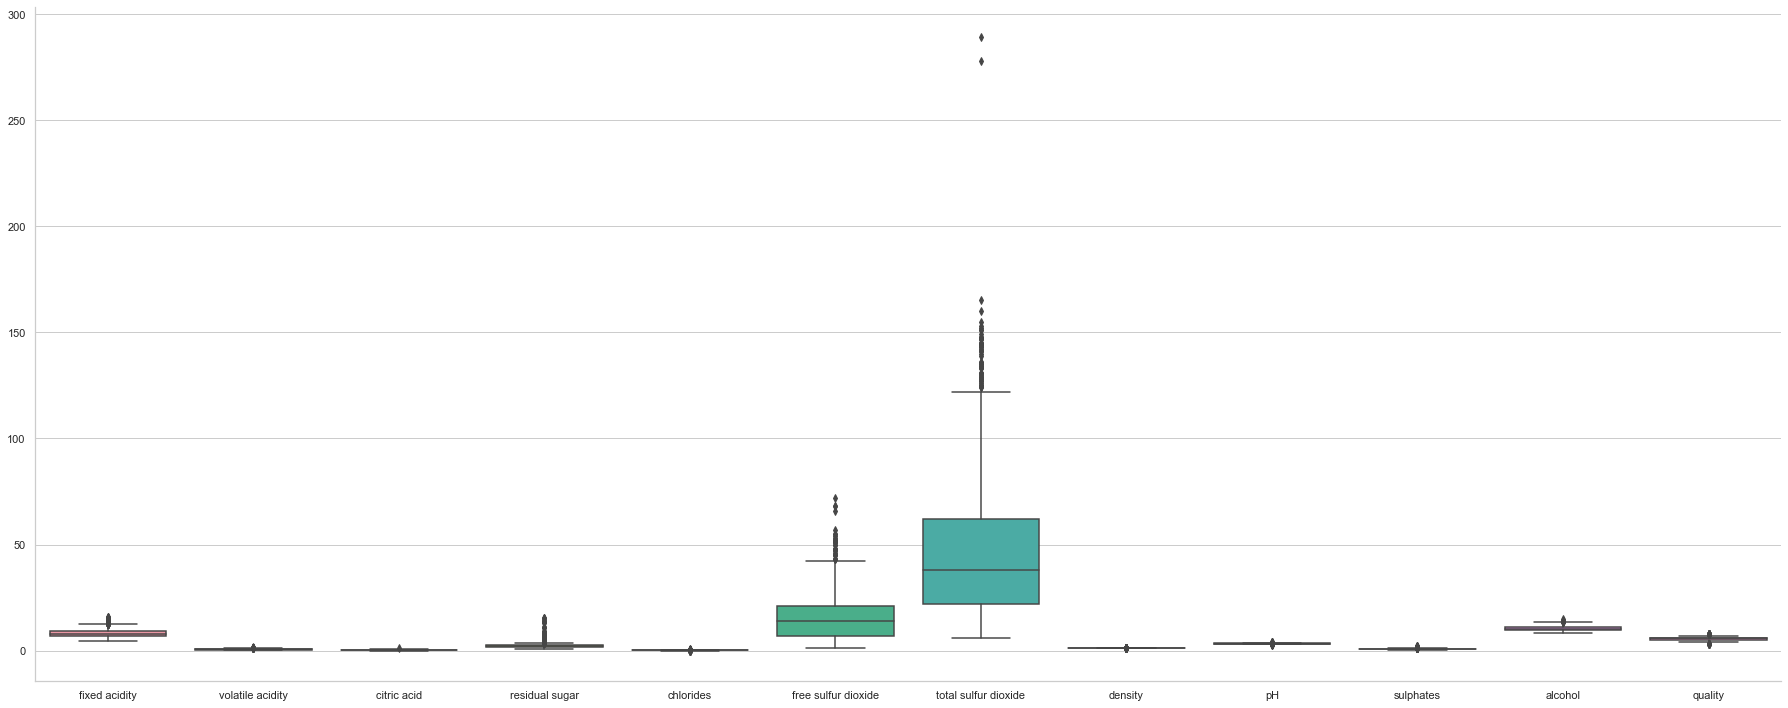

In [10]:
sns.factorplot(data=df,kind='box',size=10,aspect=2.5) # the values are distributed over a very small scale.

*Notes from Sarah to Dan*  
Can you add more comments to the code below?

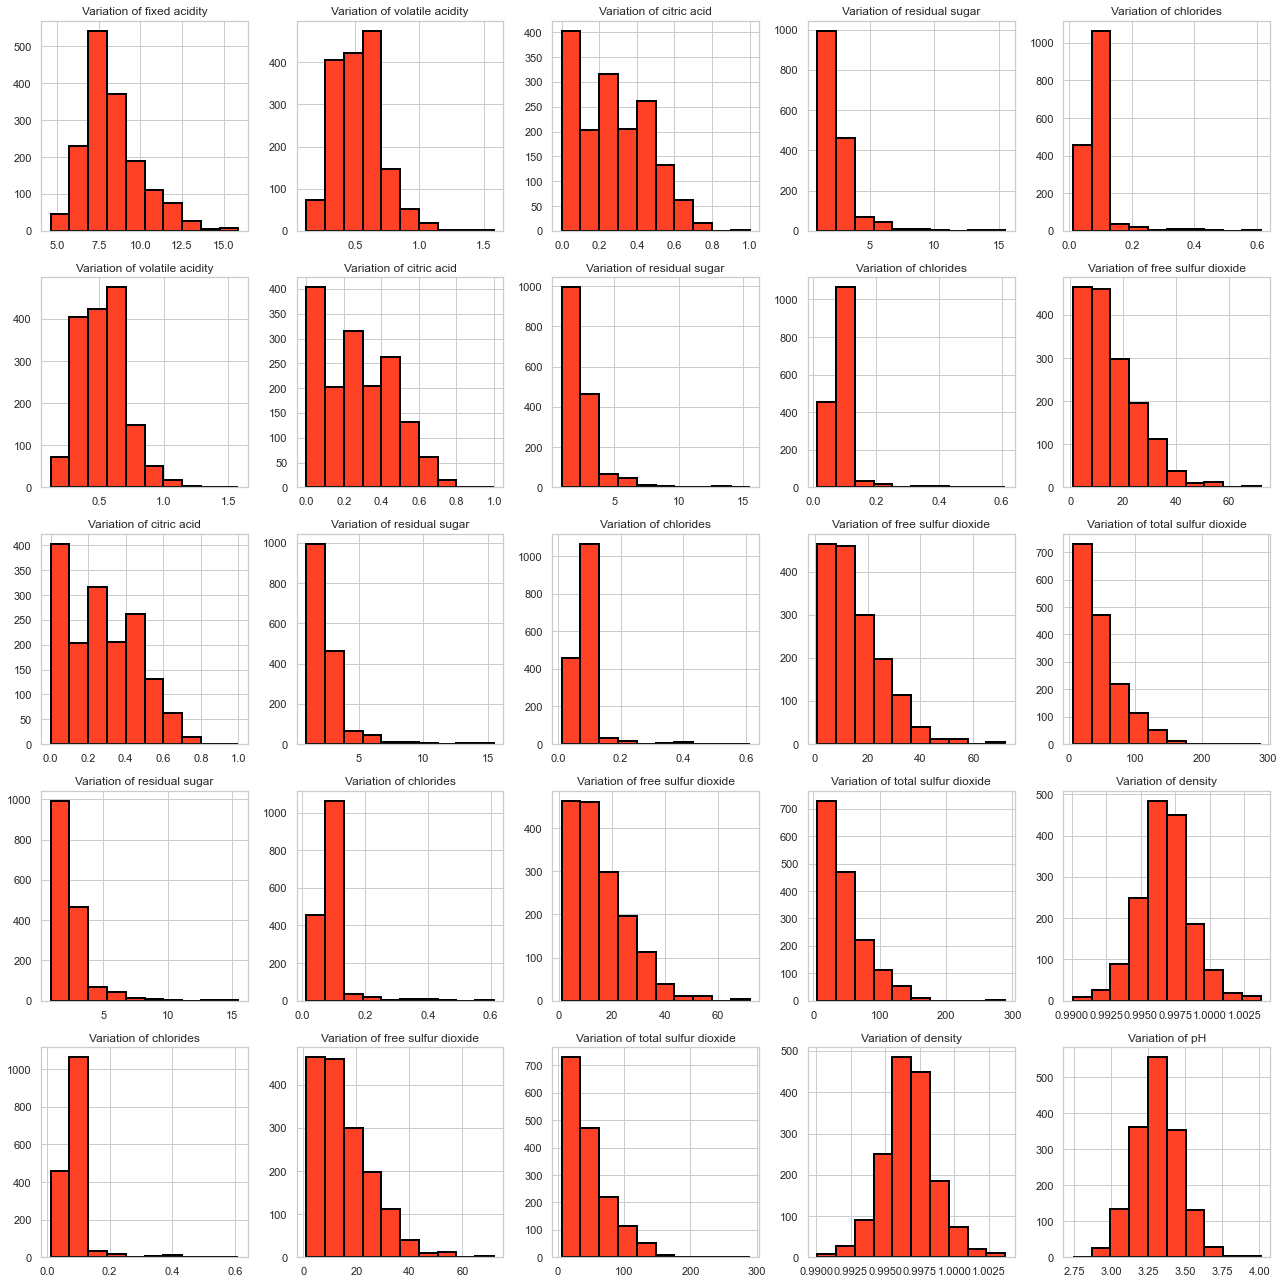

In [11]:
# Plotting the wine features in individual histograms. 
fig,axes=plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()

#  Using a Correlation Map/Matrix 

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

Key decisions to be made when creating a correlation matrix include: choice of correlation statistic, coding of the variables, treatment of missing data, and presentation.

*Notes from Sarah to Dan*  
Can you add more comments to the code below?

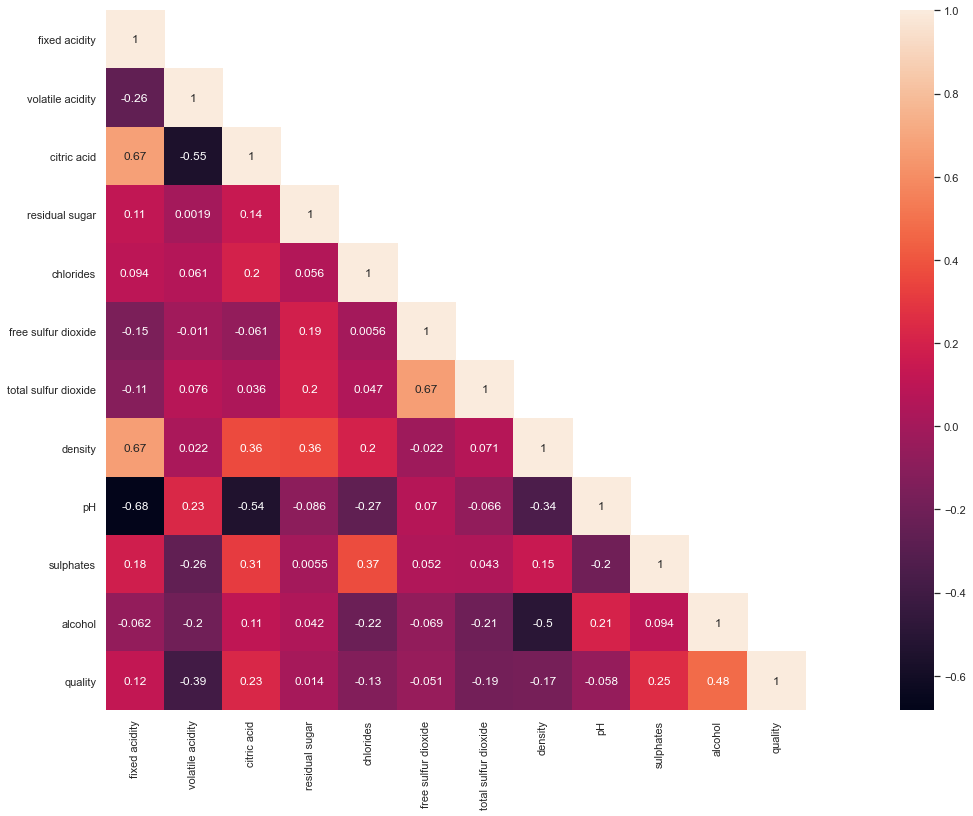

In [12]:
# Configuring a correlation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

#  What are some inferences we can make with the above chart?

1. The quality of wine is highly related to volatile acidity.

2. Also the quality of wine is highly corelated to alcohol.

3. pH and citric acid/ fixed acidity are highly inversely related as all of us know that acids have smaller pH values.

4. Self Relation ie of a fetaure to itself is 1 as expected.

5.  some other similar inferences can be drawn.

#### Removing highly correlated variables

Data scientists would normally remove highly correlated variables due to the fact that having too much data in our model can create a problem with "overfitting" our model. In this case though we will leave the correlated variables and continue on with our study.

# Visualizing quality in relation to other features

As we noted at the beginning of the exercise, we will have to compare the `quality` variable to the other features in the data such as fixed acidity compared to quality. Using data visualization we can uncover some interesting relationships in our data.

*Notes from Sarah to Dan*  
Can you add more comments or intrudction to the code below? Such as bar vs violin vs swarm?

In [13]:
def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)
    

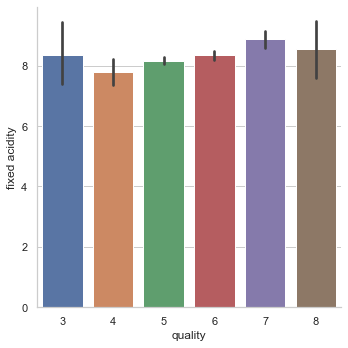

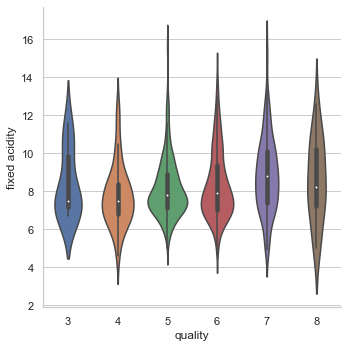

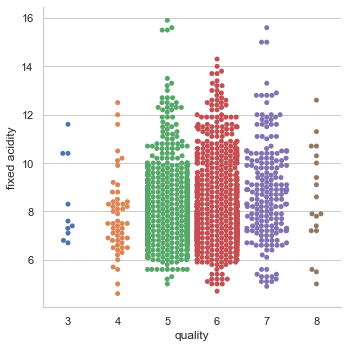

In [14]:
# for fixed acidity.
plot('fixed acidity','quality')

**Exercise: What inferences can you make about `fixed acidity`?**

*Notes from Sarah to Dan*  
Can you add an "answer" to this for the instructor/Learn modules?

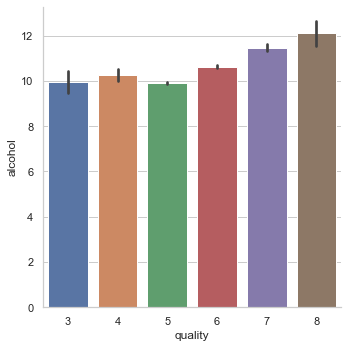

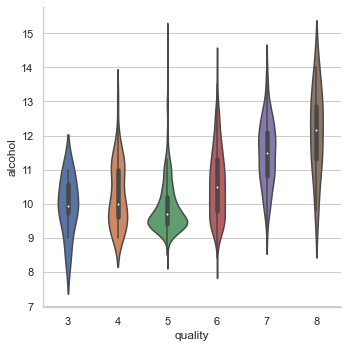

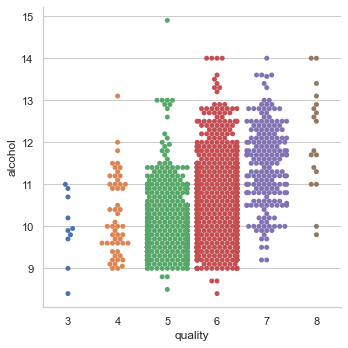

In [15]:
# for alcohol.
plot('alcohol','quality')

**Exercise: What inferences can you make about `alcohol`?**

We can do this process on other variables to see similarities. 

# Data Modeling

Now that we've spent a large portion of our time exploring the data, let's start looking at creating some models. We can use some code to leverage many features of pandas and dataframes to create multiple models quickly. In this first section we will configure nine regression models at once and see which provides the most accurate results.

In [16]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [17]:
label_quality = LabelEncoder()

In [18]:
# Bad = 0 and Good = 1 
df['quality'] = label_quality.fit_transform(df['quality'])

Create test and training data and run all the models.

In [19]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

In [ ]:
*Notes from Sarah to Dan*  
Please briefly describe each of the models you have here.

In [20]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modeling Algo':model_names,'Accuracy':acc}
d

{'Modeling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.875, 0.875, 0.87, 0.8625, 0.915, 0.895, 0.8775, 0.8525]}

## Visualizing the Regression Model's Accuracy

*Notes from Sarah to Dan*  
Missing intro

In [21]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modeling Algo,Accuracy
0,LogisticRegression,0.8750
1,LinearSVM,0.8750
2,rbfSVM,0.8700
3,KNearestNeighbors,0.8625
4,RandomForestClassifier,0.9150
5,DecisionTree,0.8950
6,GradientBoostingClassifier,0.8775
7,GaussianNB,0.8525


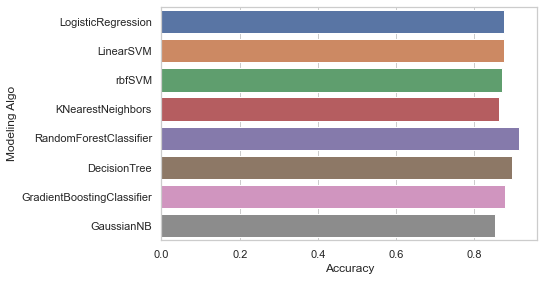

In [22]:
sns.barplot(y='Modeling Algo',x='Accuracy',data=acc_frame)

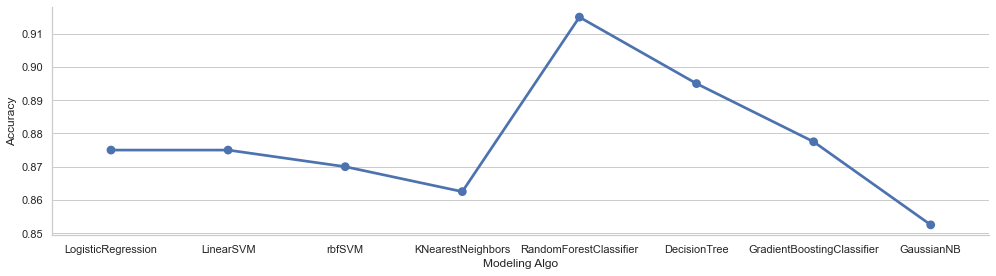

In [23]:
sns.factorplot(x='Modeling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

**It appears that the Random Forest Classifier alogrithm has a slight edge with +0.91**

*Notes from Sarah to Dan*  
Please describe what this means

# Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.

In [32]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)
    

In [33]:
acc_frame

,Modeling Algo,Accuracy
0,LogisticRegression,0.8750
1,LinearSVM,0.8750
2,rbfSVM,0.8700
3,KNearestNeighbors,0.8625
4,RandomForestClassifier,0.9150
5,DecisionTree,0.8950
6,GradientBoostingClassifier,0.8775
7,GaussianNB,0.8525


## Note the different algorithms and the respective accuracies

1. Note that here the accuracies increase marginally on scaling.

2. Also for this data, StandardScaling seems to give slightly better results than the MinMaxScaling.

3. For some modelling algos there is a considerable increase in accuracies upon scaling the features like SVM, KNN wheras for others there isn't a considerable increase in accuracies upon scaling.

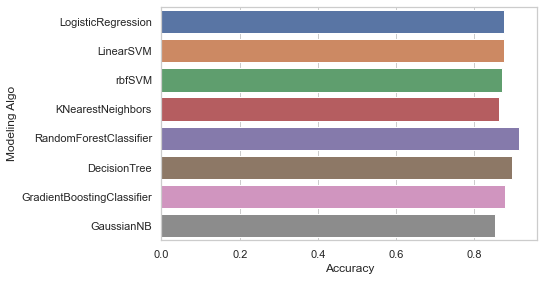

In [39]:
# Looking at the scaled accuracies in a visualiztion
sns.barplot(y='Modeling Algo',x='Accuracy',data=acc_frame)

#  Parameter Tuning

Machine learning models are parameterized so that their behavior can be tuned for a given problem.

Models can have many parameters and finding the best combination of parameters can be treated as a search problem.

Machine Learning has a foundation built from several sophisticated models. Every such model has a set of keys called parameters which run them. Each parameter is set to a default value which can be changed as per requirement (say, based on some scoring metric).

Now, every real world data set is different and needs to be worked on differently. If the same model with a strict parameter set is applied on every data, a good result cannot be expected uniformly in all cases. Thus, these parameters must be adjusted in such a manner that the best predictions can be achieved by the model for every individual data set which comes by.

This very technique of adjusting the elements which control the behavior of a given model is called parameter tuning. Using this process we can narrow down and select the best algorithms for our research.

Let's look at five popular models and prepare each of them so we practice some parameter tuning and move forward with our study. This is a practice that data scientists use with nearly each problem they encounter.

### 1.   Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

In [35]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
clf_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [37]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

0.8841036414565826

In [38]:
# clf_lr.grid_scores_

In [51]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.875

###   2. k-Nearest Neighbor (KNN)

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:

1. Ease to interpret output

2. Calculation time

3. Predictive Power


In [52]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [53]:
clf_knn.best_score_

0.8774229691876752

In [54]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 2}

In [55]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.865

### 3. Support Vector Machine - SVM

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [56]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [57]:
clf.best_score_

0.8990896358543419

In [58]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
# now tuning finally around these values of C and gamma and the kernel for further increasing the accuracy.
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

In [ ]:
clf_svm.best_score_

In [ ]:
clf_svm.best_params_

In [ ]:
clf_svm.grid_scores_

In [ ]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

###   4. Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [59]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [60]:
clf_rf.best_score_

0.9132610508757297

In [61]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [62]:
clf_rf.grid_scores_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91326, std: 0.02417, params: {'max_features': 'auto', 'n_estimators': 500},
 mean: 0.91159, std: 0.02208, params: {'max_features': 'sqrt', 'n_estimators': 500},
 mean: 0.91326, std: 0.02547, params: {'max_features': 'log2', 'n_estimators': 500}]

In [63]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.9025

### 5. Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

The idea of gradient boosting introduced the view of boosting algorithms as iterative functional gradient descent algorithms. That is, algorithms that optimize a cost function over function space by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction. This functional gradient view of boosting has led to the development of boosting algorithms in many areas of machine learning and statistics beyond regression and classification.

In [68]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [70]:
clf_gb.best_score_

0.9099249374478732

In [71]:
clf_gb.best_params_

{'n_estimators': 500}

In [72]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.8875

### Checkpoint

Which algorithm has the best accuracy and why?

*Notes from Sarah to Dan*  
Please add a conclusion here for what they might have learned or what to do next